In [6]:
##Part 1
##Data Generation 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

# Number of samples
num_samples = 1000

# Generate normally distributed data for age, height, weight, and income
ages = np.random.normal(35, 10, size=num_samples).astype(int)
# Ensure ages are within a realistic range (e.g., 18 to 70)
ages = np.clip(ages, 18, 70)

height = np.random.normal(170, 15, size=num_samples).astype(int)
# Ensure heights are within a realistic range (e.g., 140 to 210)
height = np.clip(height, 140, 210)

weight = np.random.normal(70, 10, size=num_samples).astype(int)
# Ensure weights are within a realistic range (e.g., 40 to 150)
weight = np.clip(weight, 40, 150)

income = np.random.normal(50000, 15000, size=num_samples).astype(int)
# Ensure incomes are within a realistic range (e.g., 0 to 200000)
income = np.clip(income, 0, 200000)

# Generate categorical feature
gender = np.random.choice(['Male', 'Female'], size=num_samples, p=[0.5, 0.5])

# Create a DataFrame with the new features
data_new = pd.DataFrame({
    'Age': ages,
    'Height': height,
    'Weight': weight,
    'Gender': gender,
    'Income': income
})

# Display the first few rows of the new dataset
print(data_new.head())

## Part 6 
## Hypothesis testing 

income_male = data_new[data_new['Gender'] == 'Male']['Income']
income_female = data_new[data_new['Gender'] == 'Female']['Income']

t_stat, p_value = ttest_ind(income_male, income_female)

# Display the t-statistic and p-value
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Interpretation of the results
if p_value < 0.05:
    print("There is a significant difference in Income between Male and Female.")
else:
    print("There is no significant difference in Income between Male and Female.")
    

   Age  Height  Weight  Gender  Income
0   39     190      63    Male   21382
1   33     183      68    Male   37094
2   41     170      62  Female   43795
3   50     160      66  Female   78315
4   32     180      51  Female   58348
T-Statistic: -0.341208950759665
P-Value: 0.7330181075734808
There is no significant difference in Income between Male and Female.


In [4]:
## Part 2 
## Descriptive Statistics
# Calculate mean, median, standard deviation, and variance for Age, Height, Weight, and Income
statistics = pd.DataFrame({
    'Mean': data_new[['Age', 'Height', 'Weight', 'Income']].mean(),
    'Median': data_new[['Age', 'Height', 'Weight', 'Income']].median(),
    'Standard Deviation': data_new[['Age', 'Height', 'Weight', 'Income']].std(),
    'Variance': data_new[['Age', 'Height', 'Weight', 'Income']].var()
})

# Calculate the mode for Gender
gender_mode = data_new['Gender'].mode()[0]

# Display the statistics
print(statistics)
print(f"Mode for Gender: {gender_mode}")

             Mean   Median  Standard Deviation      Variance
Age        34.817     35.0            9.480263  8.987539e+01
Height    170.682    170.0           14.577770  2.125114e+02
Weight     69.536     69.5            9.848436  9.699170e+01
Income  49718.702  50002.5        15406.983322  2.373751e+08
Mode for Gender: Male


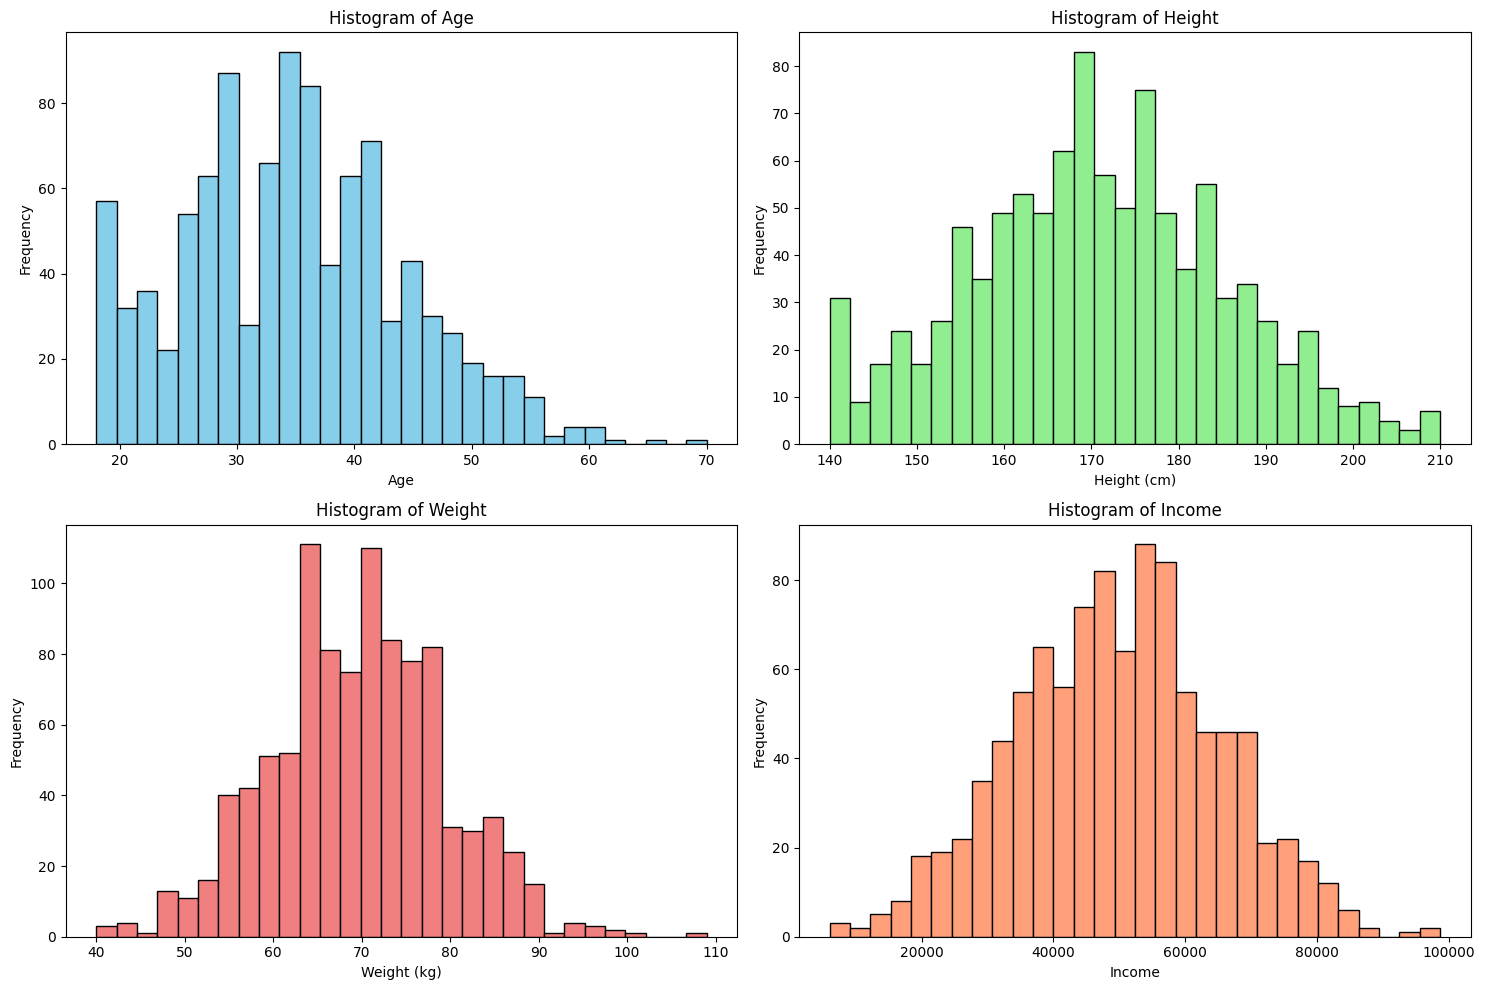

In [10]:
## Part 3 
## Data Visualization 
# Plot histograms for Age, Height, Weight, and Income

plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
plt.hist(data_new['Age'], bins=30, color='skyblue', edgecolor='black')

plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

plt.subplot(2, 2, 2)
plt.hist(data_new['Height'], bins=30, color='lightgreen', edgecolor='black')
plt.title('Histogram of Height')
plt.xlabel('Height (cm)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 3)
plt.hist(data_new['Weight'], bins=30, color='lightcoral', edgecolor='black')
plt.title('Histogram of Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Frequency')

plt.subplot(2, 2, 4)
plt.hist(data_new['Income'], bins=30, color='lightsalmon', edgecolor='black')
plt.title('Histogram of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



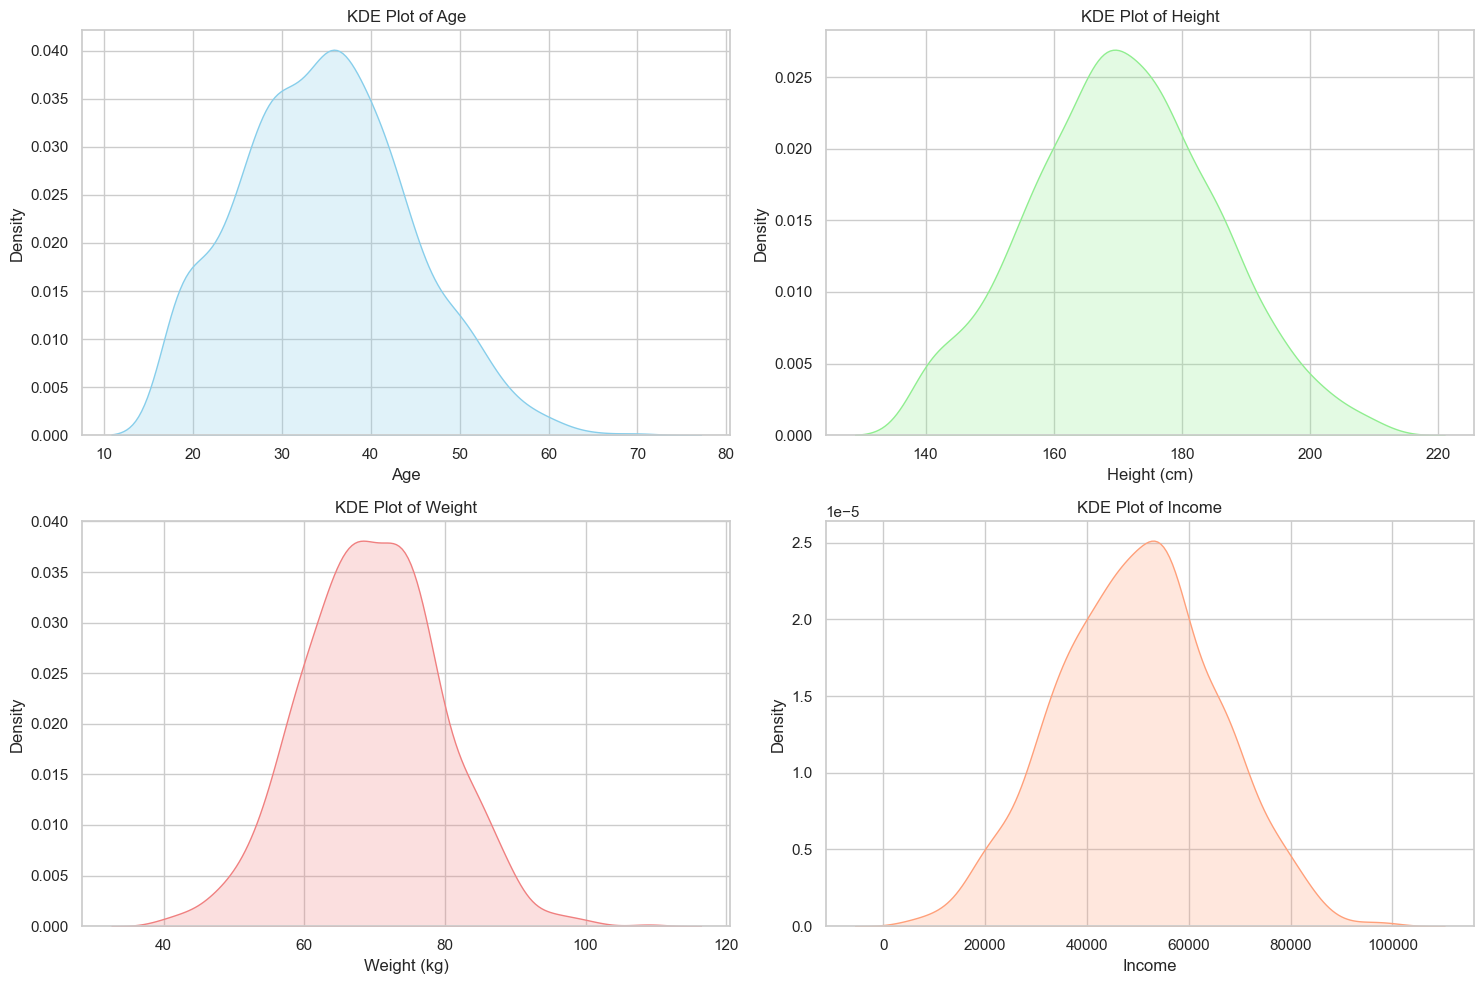

In [11]:
## Using KDE Plots 
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create KDE plots for Age, Height, Weight, and Income
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.kdeplot(data=data_new['Age'], fill=True, color="skyblue")
plt.title('KDE Plot of Age')
plt.xlabel('Age')
plt.ylabel('Density')

plt.subplot(2, 2, 2)
sns.kdeplot(data=data_new['Height'], fill=True, color="lightgreen")
plt.title('KDE Plot of Height')
plt.xlabel('Height (cm)')
plt.ylabel('Density')

plt.subplot(2, 2, 3)
sns.kdeplot(data=data_new['Weight'], fill=True, color="lightcoral")
plt.title('KDE Plot of Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Density')

plt.subplot(2, 2, 4)
sns.kdeplot(data=data_new['Income'], fill=True, color="lightsalmon")
plt.title('KDE Plot of Income')
plt.xlabel('Income')
plt.ylabel('Density')

plt.tight_layout()
plt.show()

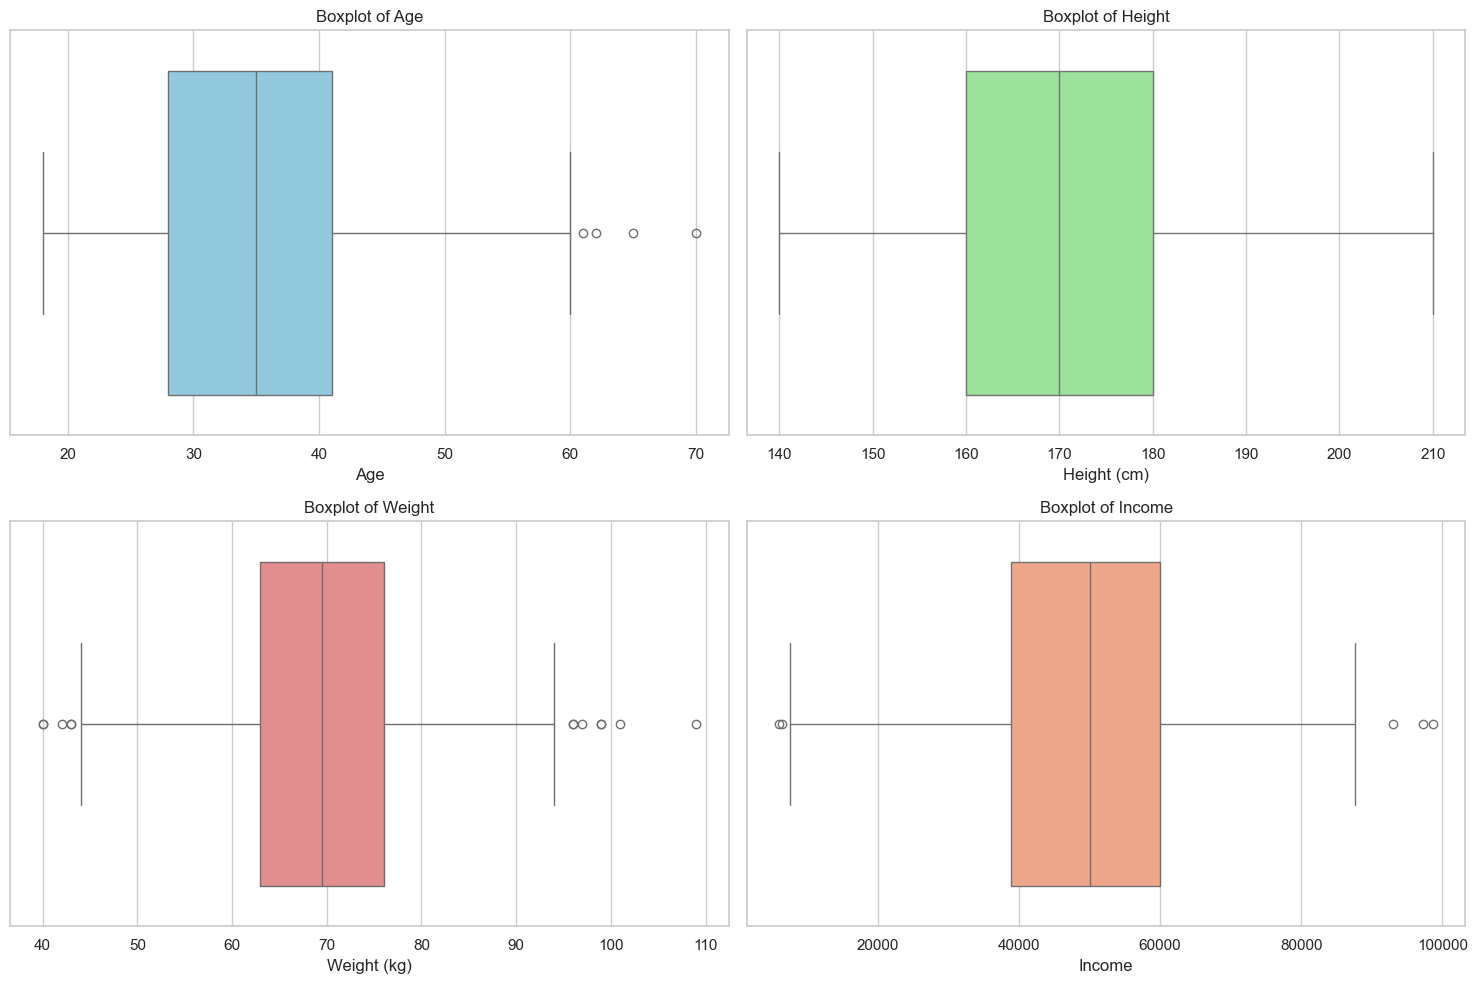

In [12]:
## Part 5 
## Boxplots to identify outliers 
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create boxplots for Age, Height, Weight, and Income
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
sns.boxplot(x=data_new['Age'], color="skyblue")
plt.title('Boxplot of Age')
plt.xlabel('Age')

plt.subplot(2, 2, 2)
sns.boxplot(x=data_new['Height'], color="lightgreen")
plt.title('Boxplot of Height')
plt.xlabel('Height (cm)')

plt.subplot(2, 2, 3)
sns.boxplot(x=data_new['Weight'], color="lightcoral")
plt.title('Boxplot of Weight')
plt.xlabel('Weight (kg)')

plt.subplot(2, 2, 4)
sns.boxplot(x=data_new['Income'], color="lightsalmon")
plt.title('Boxplot of Income')
plt.xlabel('Income')

plt.tight_layout()
plt.show()

In [13]:
#Part6 
## Correlation Analysis 
# Calculate the Pearson correlation coefficient
correlation_matrix = data_new[['Age', 'Height', 'Weight', 'Income']].corr()

# Display the correlation matrix
print(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()


             Age    Height    Weight    Income
Age     1.000000 -0.046676  0.025904 -0.012309
Height -0.046676  1.000000 -0.012171 -0.056875
Weight  0.025904 -0.012171  1.000000  0.020844
Income -0.012309 -0.056875  0.020844  1.000000


In [5]:
## Part 6 
# Hypothesis testing - T-test 

# Perform a t-test to see if there is a significant difference in Income between Male and Female
income_male = data_new[data_new['Gender'] == 'Male']['Income']
income_female = data_new[data_new['Gender'] == 'Female']['Income']

t_stat, p_value = ttest_ind(income_male, income_female)

# Display the t-statistic and p-value
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Interpretation of the results
if p_value < 0.05:
    print("There is a significant difference in Income between Male and Female.")
else:
    print("There is no significant difference in Income between Male and Female.")
    

NameError: name 'data_new' is not defined